# Teoría de los Circuitos 2        <img src="./logo_UTN.svg" align="right" width="150" />
# Curso: R4001    Año: 2024
## Tarea Semanal 3 

#### Fabian Villada

![TS3enunciado](enunciadoTS3.png)

### Definiciones iniciale e importacion de librerias a utilizar

In [26]:
from scipy.signal import TransferFunction
import numpy as np
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys
import matplotlib.pyplot as plt
# módulo de SciPy
from scipy import signal as sig
from IPython.display import display, Math, Markdown
# variable de Laplace
from sympy.abc import s

In [27]:
import matplotlib as mpl

plt.figure(1)
plt.close(1)

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

### Plantilla NORMALIZADA

<img src="./8.jpeg"  width="250" />

Hay una relacion de 2 veces entre $\omega _{p_{N}}$ y $\omega _{s_{N}}$ 

$\omega _{p_{N}}$ : Frecuencio de corte Normalizada

$\omega _{s_{N}}$ : frecuencia de corte Superior Normalizada

Norma de Frecuencia $\Omega _{N}$ = 1500

Podemos pensar trabajar en octavas donde cada polo EN APROXIMACION  mete 6db/oct. Por lo que podriamos en primera instancia pensar en un orden 2

<div class="alert alert-block alert-info">
<b>1)</b> Determinacion de Epsilon y orden del filtro por iteracion
</div>

In [28]:
eps_sq = 10**(alfa_max/10)-1
eps = np.sqrt(eps_sq)
print("Epsilon = ", eps)
for nn in range(2,5):
    alfa_min= 10*np.log10(1 + eps_sq * ws**(2*nn))
    print( 'nn: {:d} - alfa_min:{:f}'.format(nn, alfa_min) )
    


Epsilon =  0.5088471399095875
nn: 2 - alfa_min:7.112002
nn: 3 - alfa_min:12.448021
nn: 4 - alfa_min:18.279176


$\alpha_{min} = 12db$  por lo tanto el orden del filtro es  <b>nn = 3</b>  y  $ \textbf{epsilon = 0.5}$

<div class="alert alert-block alert-info">
<b>2)</b> Hallamos el polinomio de orden nn utilizando el concepto de partes de funcion
</div>

$\left | T_{j\omega } \right |^{2} = \left| T_{j\omega} \right| * \left| T_{-j\omega} \right|$

$\left | T_{j\omega } \right |^{2} = \frac{1}{1+\varepsilon^{2}* \omega^{2*3}}$

evaluamos para  $\omega=\frac{s}{j}$


$\left | T_{j\omega } \right |^{2} = \frac{1}{1+\varepsilon^{2}* \frac{s^{6}}{j^{6}}}$

$T_{s} * T_{-s} = \frac{1}{s^{6}*\varepsilon^{2} + 1} = \frac{\frac{-1}{\varepsilon²}}{s⁶-\frac{1}{\varepsilon²}}$


Los denominadores de $T_{s}$  y  $T_{-s}$  son polinomios de orden 3

$T_{s} * T_{-s} = \frac{a}{s^{3}+b*s^{2}+c*s+d} * \frac{-a}{s^{3}-b*s^{2}+c*s-d}$

Por lo tanto:

$\frac{1}{1+\varepsilon^{2}} * \frac{s^{6}}{j^{6}} =  \frac{a}{s^{3}+b*s^{2}+c*s+d} * \frac{-a}{s^{3}-b*s^{2}+c*s-d}$

Trabajamos con los coeficientes:

$s^{3}+b*s^{2}+c*s+d * s^{3}-b*s^{2}+c*s-d = s^{9} - b*s{5} + c * s^{4} - d * s^{3} + b * s^{5} - b^{2} * s^{4} + b * c * s^{3} - b * d * s^{2} + c * s^{4} - c * b * s^{3} + c^{2} * s^{2} - d * c * s + d * s^{3} - d * b *s{2} + d * c * s - d^{2}$

Coef. orden 0:

$-a^{2}= -\frac{1}{\varepsilon^{2}}$

$ -d^{2} = -\frac{1}{\varepsilon^{2}}$  $\Rightarrow {\color{red} a = d}$ (1)

Coef. orden 1 :

$ - c * d + d * c = 0$  se anulan

Coef. orden 2:

$-b * d + b * d + c^{2} = 0$     $\Rightarrow c^{2} = 2 * b * d$ (2)

Coef. orden 3:

$-d + b * c - b * c + d = 0$   se anulan

Coef. orden 4:

$ - b^{2} + c + c = 0$    $\Rightarrow 2 *c = b^{2}$ (3)

remplazando (2) en (3):

$b^{2} = 2 * \sqrt{\frac{2*b}{\varepsilon}} \Rightarrow {\color{red} b = \sqrt [3] {\frac{8}{\varepsilon}}}$

$De (3)  \rightarrow c = \frac{b^{2}}{2} \Rightarrow {\color{red} c =\sqrt{ 2 * \sqrt[3]{\frac{8}{\varepsilon}} * \frac{1}{\varepsilon}}} $  

o    $De(2) {\color{red} c = \frac{\sqrt[3]{\frac{8}{\varepsilon}}}{2}}$

In [ ]:
ya estamos en condiciones de escribir el polinomio de la transferencia de maxima planicidad que cumple con la plantilla dada

$T_{s} = \frac{\frac{1}{\varepsilon}}{s_{3} + \sqrt[3]{\frac{8}{\varepsilon}} - s^{2} + 2 * \sqrt[3]{\frac{8}{\varepsilon}} * \frac{1}{\varepsilon} * s  + \frac{1}{\varepsilon}}$


### Calculo numerico los coeficientes

In [29]:

a = 1/eps

b = np.cbrt(8 / eps)

c = np.sqrt(2*np.cbrt(8/eps) * 1/eps)

print(" a = {:f} - b = {:f} - c = {:f} ".format(a,b,c))

 a = 1.965227 - b = 2.505153 - c = 3.137895 


${\color{red}T_(s) = \frac{1.965}{s^{3} + 2.505 * s{2} + 3.138 * s + 1.965}}$

### Determinacion numerica POLOS Y CEROS

In [32]:
# Coeficientes del polinomio del denominador
den_coef = [1, 2.505, 3.138, 1.965]

# Encontrar los polos
polos = np.roots(den_coefs)

# Coeficiente del polinomio del numerador
num_coef = [1.964]

# Encontrar el cero
cero = np.roots(num_coef)

# Imprimir los polos y ceros
print("Polos:", polos)
print("Cero:", cero)

Polos: [-1.25219545+0.j         -0.62640227+1.08483364j -0.62640227-1.08483364j]
Cero: []


<div class="alert alert-block alert-info">
<b>3)</b> Factorizacion
</div>

$T_{s} = \frac{1.965}{[s - (-1.25 )] * [s - (-0.626+1.084j)] * [s - (-0.626-1.084j)]}$

$T_{s} =  \frac{1.965}{[s + 1.25 ] * [s + 0.626 - 1.084j] * [s + 0.626 + 1.084j]}$

$T_{j*\omega} = \frac{1.965}{[j*\omega + 1.25 ] * [j * \omega + 0.626 - 1.084j] * [j * \omega + 0.626 + 1.084j]}$

operando y evalunado $\omega = \frac{s}{j}$

${\color{blue}T_{s} =  \frac{1.965}{[s + 1.25 ] * [s^{2} + 1.252 * s + 1.567]}}$







<div class="alert alert-block alert-info">
<b>3)</b> Simulacion
</div>

[[1,
  array([<Axes: title={'center': 'Respuesta de Magnitud'}, ylabel='Magnitud [dB]'>,
         <Axes: title={'center': 'Respuesta de Fase'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Fase [rad]'>],
        dtype=object)],
 [2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>],
 [3, []],
 [4,
  <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>]]

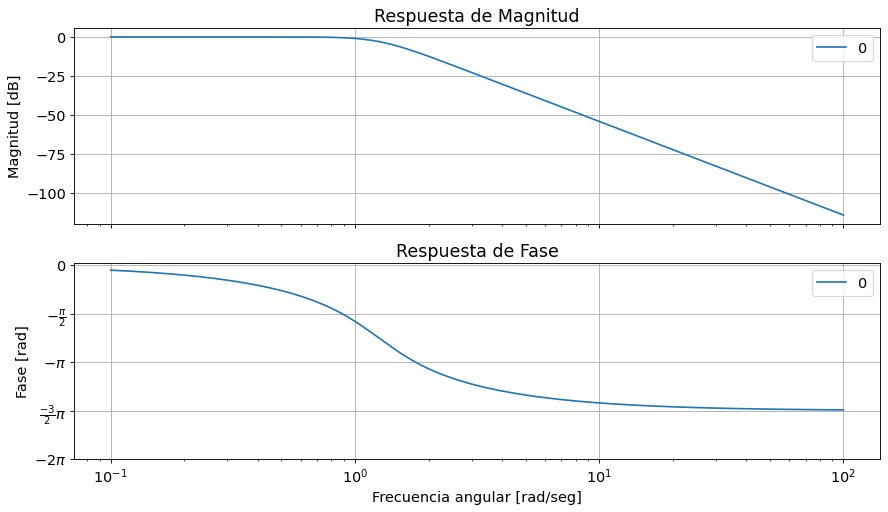

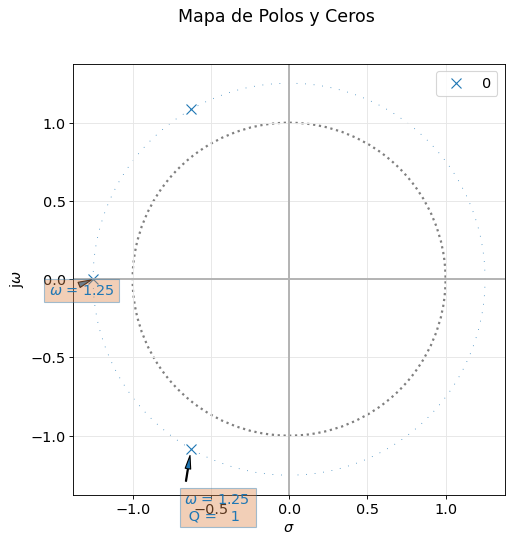

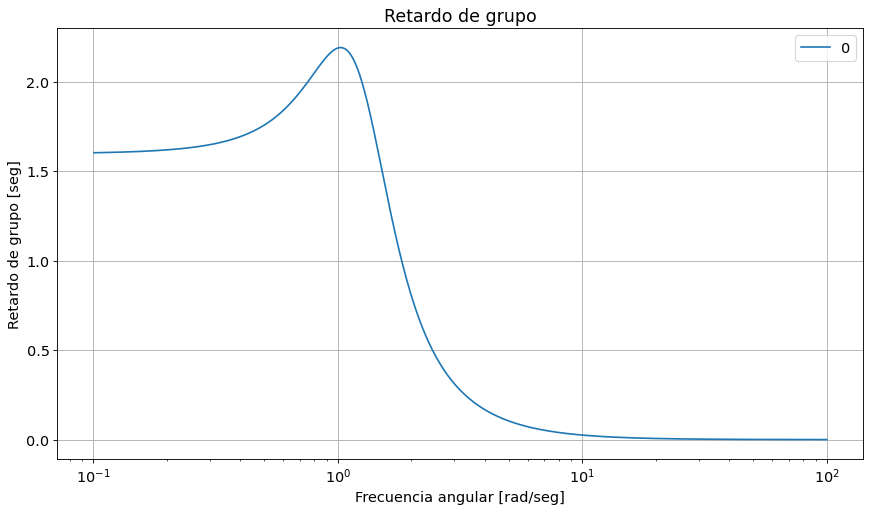

In [33]:
H1 = sig.TransferFunction( num_coef, den_coef )
analyze_sys(H1)

Observamos que para w = 1 la curva decae $\alpha_{max} = 1db$

(-5.0, 0.0)

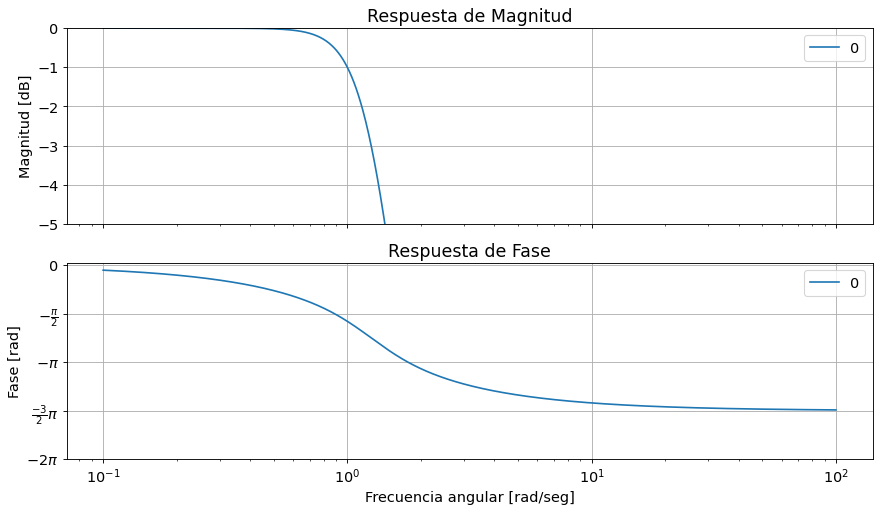

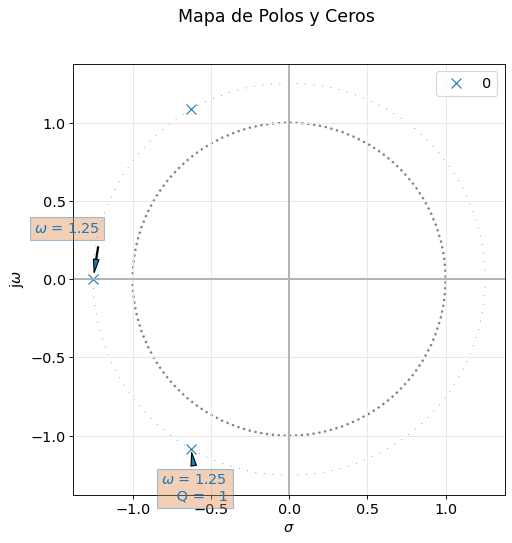

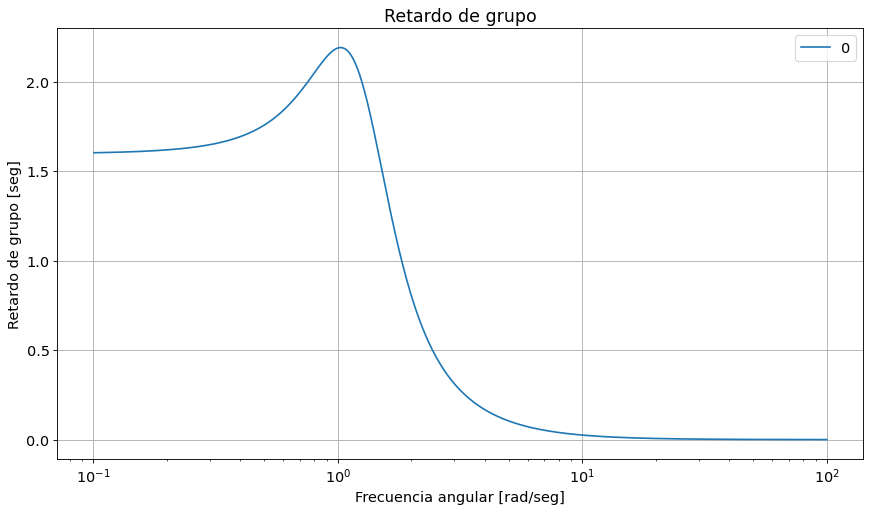

In [35]:
resultados = analyze_sys(H1)

# Obtén el primer objeto Axes del primer elemento de la lista
primer_objeto_axes = resultados[0][1][0]

# Establece los límites del eje y en (-1, 0)
primer_objeto_axes.set_ylim(-5, 0)

<div class="alert alert-block alert-info">
<b>3)</b> Implementacion circuito normalizada con red pasiva</div>

![TS](TS3.png)

Etapa orden 1:

$\frac{\frac{1}{R*C}}{1+\frac{1}{R*C}} \rightarrow \frac{1.25}{s + 1.25}$

$\frac{1}{RC} = 1.25$ con R = 1 $ \Rightarrow C_{1} = 0.8$

Etapa orden 2:

$\frac{\frac{1}{LC}}{s^{2} + s * \frac{R}{L} + \frac{1}{LC}} \rightarrow \frac{1.567}{ [s^{2} + 1.252 * s + 1.567]}$

$\frac{1}{LC} = 1.567$  y  $\frac{R}{L} = 1.252$

con R = 1 $\rightarrow L = \frac{1}{1.252} = 0.798 \Rightarrow  C_{2}=\frac{1}{0.798*1.567}=0.8$

![Spice](Spice_TS3.png) 

Se saco el buffer en la simulacion pq distorsionaba la salida. Igualmente se ve que para  $ \omega_{p} = 1 $ o sea $f_{p} = \frac{1}{2*\pi} = 0.159hz$ la atenuacion deberia ser $\alpha_{max} = 1db$ y como vemos en la imagen esta se da para otro valor de frecuencia. 
Lo mismo para $\omega_{p}= 3  \rightarrow f_{p} = 0.477Hz$ y $\alpha_{min} = 12db$